# Music Recommendation System 

## Introduction: 
This notebook is a compilation of all my code throughout this product. In this project I am creating a music reccommendation system using data that I accessed through the Spotify API and utilized to create my own test dataset. However, I plan on expanding this project in the future by using a larger dataset so I can conduct some more complicated analysis and create a more intricate model. 

# Utilizing Spotify API to Create a Dataset 

In [5]:
# my spotify access key which is needed to access the API
client_id = "fd156f449b1a44359bb23cf0c2d67dfc"
client_secret = "3a69b492b52b4624b60b620b39e8d4ea"

In [6]:
# Getting access token 

import requests
import base64

def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = {
        'Authorization': f'Basic {base64.b64encode((client_id + ":" + client_secret).encode()).decode()}'
    }
    auth_data = {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret
    }
    auth_response = requests.post(auth_url, data=auth_data, headers=auth_header)
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    return access_token


In [7]:
# Utilizing the token to get a list of 50 genres classified by Spotify

def get_genres(access_token, limit=50, offset=0):
    genres_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {
        'Authorization': 'Bearer ' + access_token
    }
    params = {
        'limit': limit,
        'offset': offset
    }
    response = requests.get(genres_url, headers=headers, params=params)
    genres_data = response.json()
    genres = [(category['id'], category['name']) for category in genres_data['categories']['items']]
    return genres

access_token = get_access_token(client_id, client_secret)  
genres = get_genres(access_token)  

print("List of genres:")
genre_list = []
for genre_id, genre_name in genres:
    genre_list.append(genre_name)

print(genre_list)



List of genres:
['Made For You', 'New Releases', 'Summer', 'Country', 'Hip-Hop', 'Pop', 'Charts', 'GLOW', 'Black Music Month', 'Latin', 'Student', 'Discover', 'Rock', 'Dance/Electronic', 'In the car', 'Mood', 'Indie', 'R&B', 'Christian & Gospel', 'Workout', 'Disney', 'Música Mexicana', 'K-pop', 'Chill', 'Netflix', 'Sleep', 'Party', 'At Home', 'Decades', 'Love', 'Metal', 'Spotify CLASSICS', 'Jazz', 'Trending', 'Frequency', 'Classical', 'Folk & Acoustic', 'Focus', 'Soul', 'Kids & Family', 'Gaming', 'Anime', 'TV & Movies', 'Instrumental', 'Punk', 'Ambient', 'Blues', 'Cooking & Dining', 'Alternative', 'Travel']


In [8]:
# Here we use the spotipy package to create a function that gets the genres of an artist given their artist ID
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_id = "fd156f449b1a44359bb23cf0c2d67dfc"
client_secret = "3a69b492b52b4624b60b620b39e8d4ea"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_artist_genres(artist_id):
    artist = sp.artist(artist_id)
    return artist['genres']

access_token = get_access_token(client_id, client_secret)  
def get_artist_genre(artist_id):
    artist = sp.artists(artist_id)
    return artist['genres']

In [9]:
# Creating the dataframe 

import pandas as pd
import time

def create_dataframe(query_list, limit=50):  # Takes a list of queries fetches tracks for each genre 
    
    data = {
        'Track ID': [],
        'Track name': [],
        'Artist name': [],
        'Popularity score': [],
        'Release year': [],
        'Genre': []
    }
    
    for query in query_list:
        
        search_results = sp.search(query, limit=limit, type='track')
        tracks = search_results['tracks']['items']
        
        
        for track in tracks:  
            data['Track ID'].append(track['id'])
            data['Track name'].append(track['name'])
            data['Artist name'].append(track['artists'][0]['name'])
            data['Popularity score'].append(track['popularity'])
            data['Release year'].append(track['album']['release_date'][:4])
            data['Genre'].append(query)

                
    df = pd.DataFrame(data)
    return df


# list of genres
genres = [
    'Made For You', 'New Releases', 'Summer', 'Country', 'Hip-Hop', 'Pop', 'Charts', 'GLOW', 'Black Music Month', 
    'Latin', 'Student', 'Discover', 'Rock', 'Dance/Electronic', 'In the car', 'Mood', 'Indie', 'R&B', 
    'Christian & Gospel', 'Workout', 'Disney', 'Música Mexicana', 'K-pop', 'Chill', 'Netflix', 'Sleep', 
    'Party', 'At Home', 'Decades', 'Love', 'Metal', 'Spotify CLASSICS', 'Jazz', 'Trending', 'Frequency', 
    'Classical', 'Folk & Acoustic', 'Focus', 'Soul', 'Kids & Family', 'Gaming', 'Anime', 'TV & Movies', 
    'Instrumental', 'Punk', 'Ambient', 'Blues', 'Cooking & Dining', 'Alternative', 'Travel'
]

# creating the DataFrame with 50 tracks from each genre
spotify_df = create_dataframe(genres, limit=50) 


In [10]:
from IPython.display import display
display(spotify_df)

spotify_df.to_csv('spotify.csv', index=False)


,Track ID,Track name,Artist name,Popularity score,Release year,Genre
0,07q0QVgO56EorrSGHC48y3,I Was Made For Lovin' You,KISS,81,1979,Made For You
1,0WIv5qV41y6YjjB9V1biuC,Made For Me,Muni Long,78,2023,Made For You
2,55ikcenXPbQdzCnO1sOuYg,I Was Made For Lovin’ You - from The Fall Guy,YUNGBLUD,72,2024,Made For You
3,7zVCrzzEJU7u24sbJPXA5W,What Ifs (feat. Lauren Alaina),Kane Brown,71,2016,Made For You
4,3iqKk5wUb8RNSV9zHqq0RG,Made For You,Jake Owen,38,2019,Made For You
...,...,...,...,...,...,...
2495,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,Eurythmics,84,1983,Travel
2496,16QEkGDqFuw8SDxmY10pNP,Traveling Kind,Yarn,30,2024,Travel
2497,0wVyUtOvYWJvniPRidlNnQ,White Noise Flakes,The White Noise Travelers,64,2022,Travel
2498,73IlJ59HkcXNNhLp0oBugd,Traveling,Jey Beatz,28,2024,Travel


In [11]:
# checking 

spotify_df["Genre"].value_counts()

Genre
Made For You          50
Focus                 50
At Home               50
Decades               50
Love                  50
Metal                 50
Spotify CLASSICS      50
Jazz                  50
Trending              50
Frequency             50
Classical             50
Folk & Acoustic       50
Soul                  50
New Releases          50
Kids & Family         50
Gaming                50
Anime                 50
TV & Movies           50
Instrumental          50
Punk                  50
Ambient               50
Blues                 50
Cooking & Dining      50
Alternative           50
Party                 50
Sleep                 50
Netflix               50
Chill                 50
Summer                50
Country               50
Hip-Hop               50
Pop                   50
Charts                50
GLOW                  50
Black Music Month     50
Latin                 50
Student               50
Discover              50
Rock                  50
Dance/Electronic   

## Fetching Audio Features

In [12]:
# retrieving the audio features 

def get_audio_features(track_ids):
    features_list = []  

    for i in range(0, len(track_ids), 50):  
        batch = track_ids[i:i+50] 
        features_results = sp.audio_features(batch)  
        features_list += features_results  

    return features_list


In [13]:
track_ids = spotify_df['Track ID'].tolist()
audio_features = get_audio_features(track_ids)

In [14]:
# removing any NA values 
audio_features = [feature for feature in audio_features if feature is not None]

audio_features_df = pd.DataFrame(audio_features)
merged_df = spotify_df.merge(audio_features_df, left_on='Track ID', right_on='id', how='inner')


In [15]:
# this is the merged data frame 
merged_df

,Track ID,Track name,Artist name,Popularity score,Release year,Genre,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,07q0QVgO56EorrSGHC48y3,I Was Made For Lovin' You,KISS,81,1979,Made For You,0.768,0.852,4,-6.215,...,0.0723,0.8670,128.373,audio_features,07q0QVgO56EorrSGHC48y3,spotify:track:07q0QVgO56EorrSGHC48y3,https://api.spotify.com/v1/tracks/07q0QVgO56Eo...,https://api.spotify.com/v1/audio-analysis/07q0...,271240,4
1,0WIv5qV41y6YjjB9V1biuC,Made For Me,Muni Long,78,2023,Made For You,0.796,0.468,7,-6.375,...,0.1180,0.0677,119.980,audio_features,0WIv5qV41y6YjjB9V1biuC,spotify:track:0WIv5qV41y6YjjB9V1biuC,https://api.spotify.com/v1/tracks/0WIv5qV41y6Y...,https://api.spotify.com/v1/audio-analysis/0WIv...,188000,4
2,55ikcenXPbQdzCnO1sOuYg,I Was Made For Lovin’ You - from The Fall Guy,YUNGBLUD,72,2024,Made For You,0.333,0.637,2,-8.428,...,0.1200,0.2740,129.868,audio_features,55ikcenXPbQdzCnO1sOuYg,spotify:track:55ikcenXPbQdzCnO1sOuYg,https://api.spotify.com/v1/tracks/55ikcenXPbQd...,https://api.spotify.com/v1/audio-analysis/55ik...,261520,4
3,7zVCrzzEJU7u24sbJPXA5W,What Ifs (feat. Lauren Alaina),Kane Brown,71,2016,Made For You,0.612,0.799,10,-4.603,...,0.1720,0.6870,125.976,audio_features,7zVCrzzEJU7u24sbJPXA5W,spotify:track:7zVCrzzEJU7u24sbJPXA5W,https://api.spotify.com/v1/tracks/7zVCrzzEJU7u...,https://api.spotify.com/v1/audio-analysis/7zVC...,188253,4
4,3iqKk5wUb8RNSV9zHqq0RG,Made For You,Jake Owen,38,2019,Made For You,0.581,0.438,1,-6.829,...,0.1160,0.3310,82.005,audio_features,3iqKk5wUb8RNSV9zHqq0RG,spotify:track:3iqKk5wUb8RNSV9zHqq0RG,https://api.spotify.com/v1/tracks/3iqKk5wUb8RN...,https://api.spotify.com/v1/audio-analysis/3iqK...,238400,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,Eurythmics,84,1983,Travel,0.692,0.711,0,-7.498,...,0.1200,0.8750,125.135,audio_features,1TfqLAPs4K3s2rJMoCokcS,spotify:track:1TfqLAPs4K3s2rJMoCokcS,https://api.spotify.com/v1/tracks/1TfqLAPs4K3s...,https://api.spotify.com/v1/audio-analysis/1Tfq...,216933,4
2547,16QEkGDqFuw8SDxmY10pNP,Traveling Kind,Yarn,30,2024,Travel,0.633,0.689,10,-6.954,...,0.3060,0.7940,136.733,audio_features,16QEkGDqFuw8SDxmY10pNP,spotify:track:16QEkGDqFuw8SDxmY10pNP,https://api.spotify.com/v1/tracks/16QEkGDqFuw8...,https://api.spotify.com/v1/audio-analysis/16QE...,250107,4
2548,0wVyUtOvYWJvniPRidlNnQ,White Noise Flakes,The White Noise Travelers,64,2022,Travel,0.157,0.228,10,-32.985,...,0.1120,0.0349,83.378,audio_features,0wVyUtOvYWJvniPRidlNnQ,spotify:track:0wVyUtOvYWJvniPRidlNnQ,https://api.spotify.com/v1/tracks/0wVyUtOvYWJv...,https://api.spotify.com/v1/audio-analysis/0wVy...,272000,4
2549,73IlJ59HkcXNNhLp0oBugd,Traveling,Jey Beatz,28,2024,Travel,0.768,0.705,11,-6.026,...,0.3290,0.3780,127.918,audio_features,73IlJ59HkcXNNhLp0oBugd,spotify:track:73IlJ59HkcXNNhLp0oBugd,https://api.spotify.com/v1/tracks/73IlJ59HkcXN...,https://api.spotify.com/v1/audio-analysis/73Il...,136934,4


# Clean the dataset

In [16]:
# gets rid of duplicates 

unique_df = merged_df.drop_duplicates(subset='Track ID', keep='first')

unique_df

,Track ID,Track name,Artist name,Popularity score,Release year,Genre,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,07q0QVgO56EorrSGHC48y3,I Was Made For Lovin' You,KISS,81,1979,Made For You,0.768,0.852,4,-6.215,...,0.0723,0.8670,128.373,audio_features,07q0QVgO56EorrSGHC48y3,spotify:track:07q0QVgO56EorrSGHC48y3,https://api.spotify.com/v1/tracks/07q0QVgO56Eo...,https://api.spotify.com/v1/audio-analysis/07q0...,271240,4
1,0WIv5qV41y6YjjB9V1biuC,Made For Me,Muni Long,78,2023,Made For You,0.796,0.468,7,-6.375,...,0.1180,0.0677,119.980,audio_features,0WIv5qV41y6YjjB9V1biuC,spotify:track:0WIv5qV41y6YjjB9V1biuC,https://api.spotify.com/v1/tracks/0WIv5qV41y6Y...,https://api.spotify.com/v1/audio-analysis/0WIv...,188000,4
2,55ikcenXPbQdzCnO1sOuYg,I Was Made For Lovin’ You - from The Fall Guy,YUNGBLUD,72,2024,Made For You,0.333,0.637,2,-8.428,...,0.1200,0.2740,129.868,audio_features,55ikcenXPbQdzCnO1sOuYg,spotify:track:55ikcenXPbQdzCnO1sOuYg,https://api.spotify.com/v1/tracks/55ikcenXPbQd...,https://api.spotify.com/v1/audio-analysis/55ik...,261520,4
3,7zVCrzzEJU7u24sbJPXA5W,What Ifs (feat. Lauren Alaina),Kane Brown,71,2016,Made For You,0.612,0.799,10,-4.603,...,0.1720,0.6870,125.976,audio_features,7zVCrzzEJU7u24sbJPXA5W,spotify:track:7zVCrzzEJU7u24sbJPXA5W,https://api.spotify.com/v1/tracks/7zVCrzzEJU7u...,https://api.spotify.com/v1/audio-analysis/7zVC...,188253,4
4,3iqKk5wUb8RNSV9zHqq0RG,Made For You,Jake Owen,38,2019,Made For You,0.581,0.438,1,-6.829,...,0.1160,0.3310,82.005,audio_features,3iqKk5wUb8RNSV9zHqq0RG,spotify:track:3iqKk5wUb8RNSV9zHqq0RG,https://api.spotify.com/v1/tracks/3iqKk5wUb8RN...,https://api.spotify.com/v1/audio-analysis/3iqK...,238400,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,1TfqLAPs4K3s2rJMoCokcS,Sweet Dreams (Are Made of This) - Remastered,Eurythmics,84,1983,Travel,0.692,0.711,0,-7.498,...,0.1200,0.8750,125.135,audio_features,1TfqLAPs4K3s2rJMoCokcS,spotify:track:1TfqLAPs4K3s2rJMoCokcS,https://api.spotify.com/v1/tracks/1TfqLAPs4K3s...,https://api.spotify.com/v1/audio-analysis/1Tfq...,216933,4
2547,16QEkGDqFuw8SDxmY10pNP,Traveling Kind,Yarn,30,2024,Travel,0.633,0.689,10,-6.954,...,0.3060,0.7940,136.733,audio_features,16QEkGDqFuw8SDxmY10pNP,spotify:track:16QEkGDqFuw8SDxmY10pNP,https://api.spotify.com/v1/tracks/16QEkGDqFuw8...,https://api.spotify.com/v1/audio-analysis/16QE...,250107,4
2548,0wVyUtOvYWJvniPRidlNnQ,White Noise Flakes,The White Noise Travelers,64,2022,Travel,0.157,0.228,10,-32.985,...,0.1120,0.0349,83.378,audio_features,0wVyUtOvYWJvniPRidlNnQ,spotify:track:0wVyUtOvYWJvniPRidlNnQ,https://api.spotify.com/v1/tracks/0wVyUtOvYWJv...,https://api.spotify.com/v1/audio-analysis/0wVy...,272000,4
2549,73IlJ59HkcXNNhLp0oBugd,Traveling,Jey Beatz,28,2024,Travel,0.768,0.705,11,-6.026,...,0.3290,0.3780,127.918,audio_features,73IlJ59HkcXNNhLp0oBugd,spotify:track:73IlJ59HkcXNNhLp0oBugd,https://api.spotify.com/v1/tracks/73IlJ59HkcXN...,https://api.spotify.com/v1/audio-analysis/73Il...,136934,4


In [17]:
# dropping uneeded columns 

import numpy as np
import pandas 

columns_to_drop = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms']
cleaned_spotify = unique_df.drop(columns=columns_to_drop)
cleaned_spotify.columns

Index(['Track ID', 'Track name', 'Artist name', 'Popularity score',
       'Release year', 'Genre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [18]:
# created the final datset that I will work with 

cleaned_spotify.to_csv('final_spotify.csv', index=False)

# Explanatory Data Science 

In [19]:
# Downloading Packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

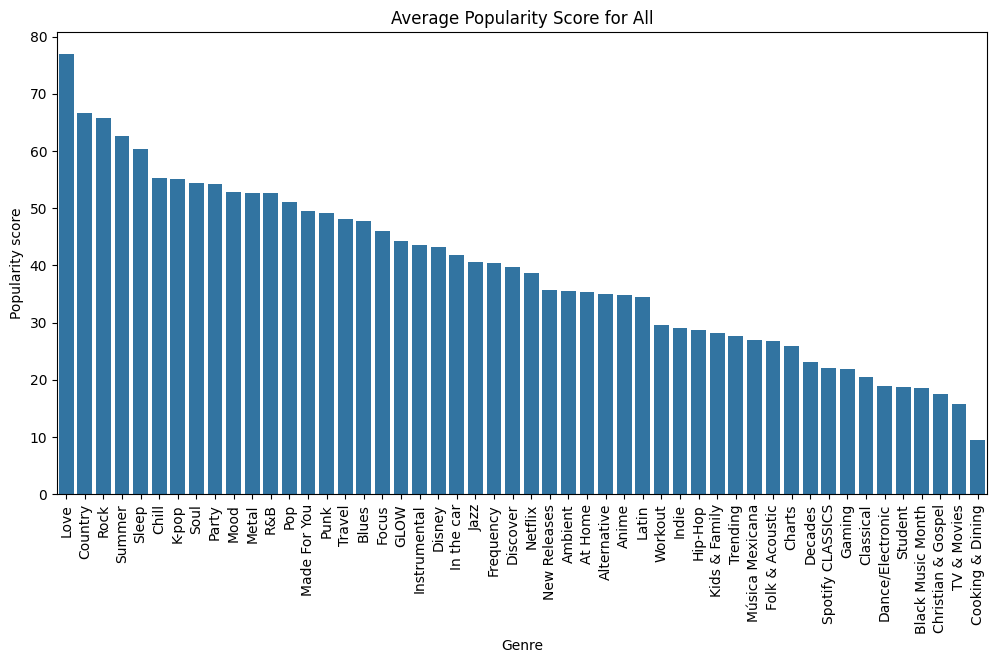

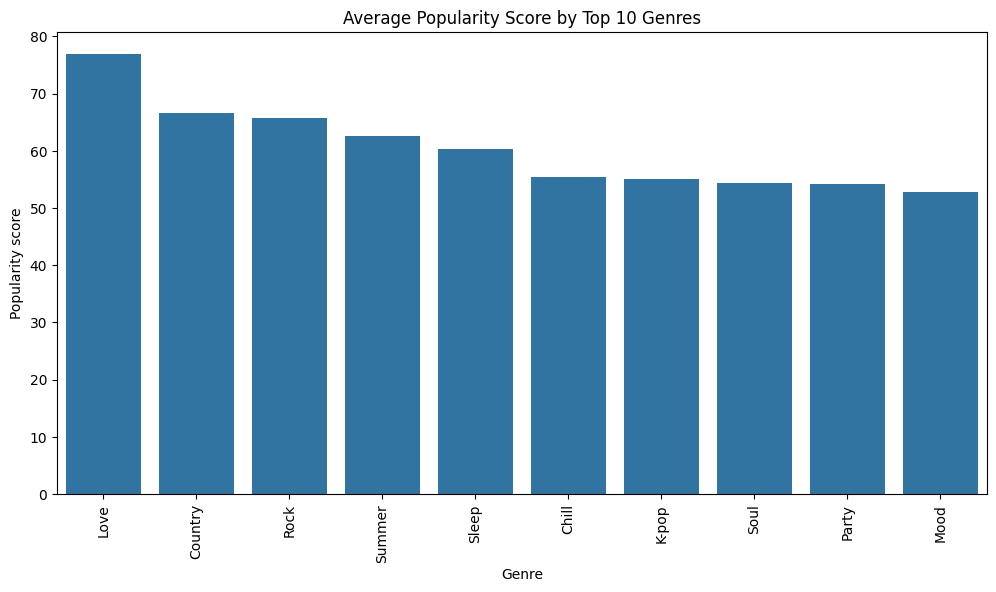

In [20]:

genre_popularity = cleaned_spotify .groupby("Genre")["Popularity score"].mean().reset_index()
genre_popularity = genre_popularity.sort_values("Popularity score", ascending=False)

# Average Popularity Score 
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Popularity score', data=genre_popularity)
plt.xticks(rotation=90)
plt.title('Average Popularity Score for All')
plt.show()

# Average Popularity Score for Top 10 Genres
top_10_genres = genre_popularity.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Popularity score', data=top_10_genres)
plt.xticks(rotation=90)
plt.title('Average Popularity Score by Top 10 Genres')
plt.show()

These plots visually demonstrate which genres are most popular, offering insights that can refine the music recommendation system by allowing me to prioritize more favored genres in the music recommender functions which help to weight genre preferences more effectively in the model. The analysis reveals that genres like Love, Country, and Rock have the highest average popularity scores, indicating strong user preference. In contrast, genres such as Cooking & Dining and Children's Music are less popular, which makes sense as these are less conventional genres and more of a metric utilized to categorize songs by Spotify. This suggests that focusing on more popular genres could enhance the effectiveness of the recommendation system.

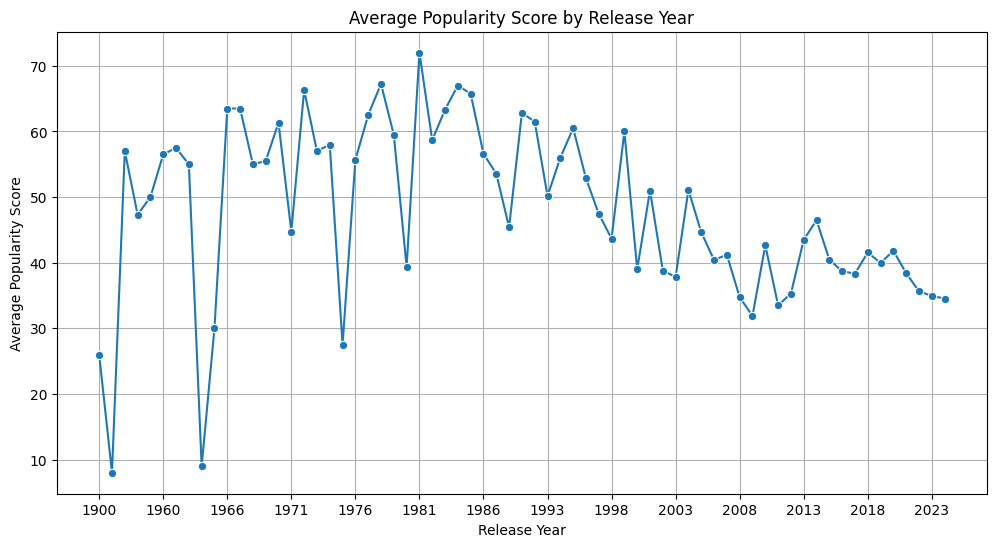

In [46]:
import matplotlib.ticker as ticker

# Create a line plot for the average popularity score by release year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release year', y='Popularity score', data=yearly_popularity, marker='o')

# Set major ticks format to show every 5 years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title('Average Popularity Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity Score')
plt.grid(True)
plt.show()


This plot illustrates the trend of average popularity scores over different release years, providing insight into how the popularity of music has evolved over time. Using this historical perspective helps in understanding user preferences across different eras. The analysis shows a peak in average popularity scores during the late 20th century, with a noticeable decline in recent years. This trend suggests that older music tends to have higher average popularity scores compared to newer releases.

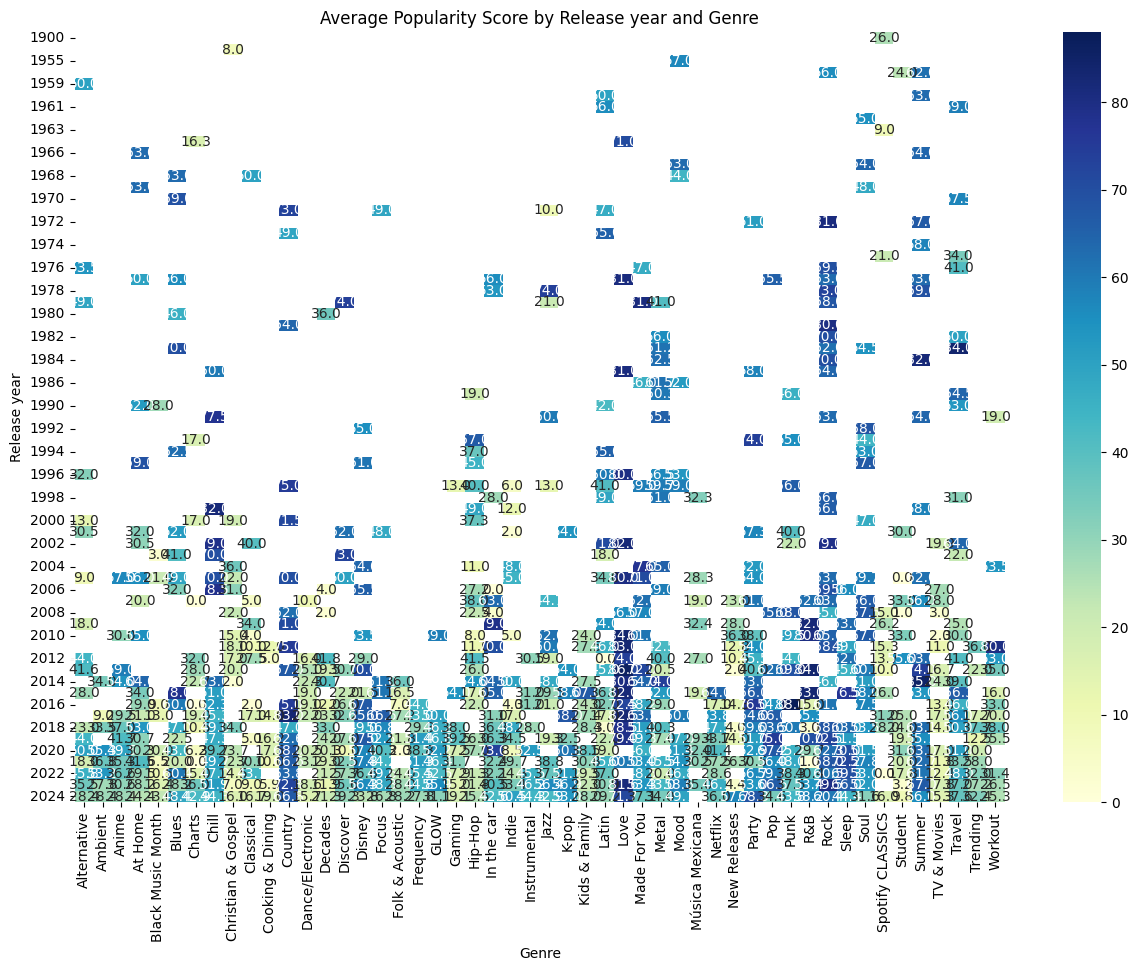

In [22]:
cleaned_spotify['Release year'] = cleaned_spotify['Release year'].astype(int)

# Calculate the average popularity score for each release year and genre
year_genre_popularity = cleaned_spotify.groupby(['Release year', 'Genre'])['Popularity score'].mean().reset_index()

popularity_matrix = year_genre_popularity.pivot(index='Release year', columns='Genre', values='Popularity score')

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(popularity_matrix, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Popularity Score by Release year and Genre')
plt.show()

This heatmap visualizes the average popularity scores by release year and genre, providing a detailed overview of how different genres have performed across time. This analysis identifies trends and shifts in music preferences. The heatmap reveals that certain genres, such as Rock and Pop, maintain high popularity across multiple years, while others, like Ambient and Instrumental, show sporadic spikes.

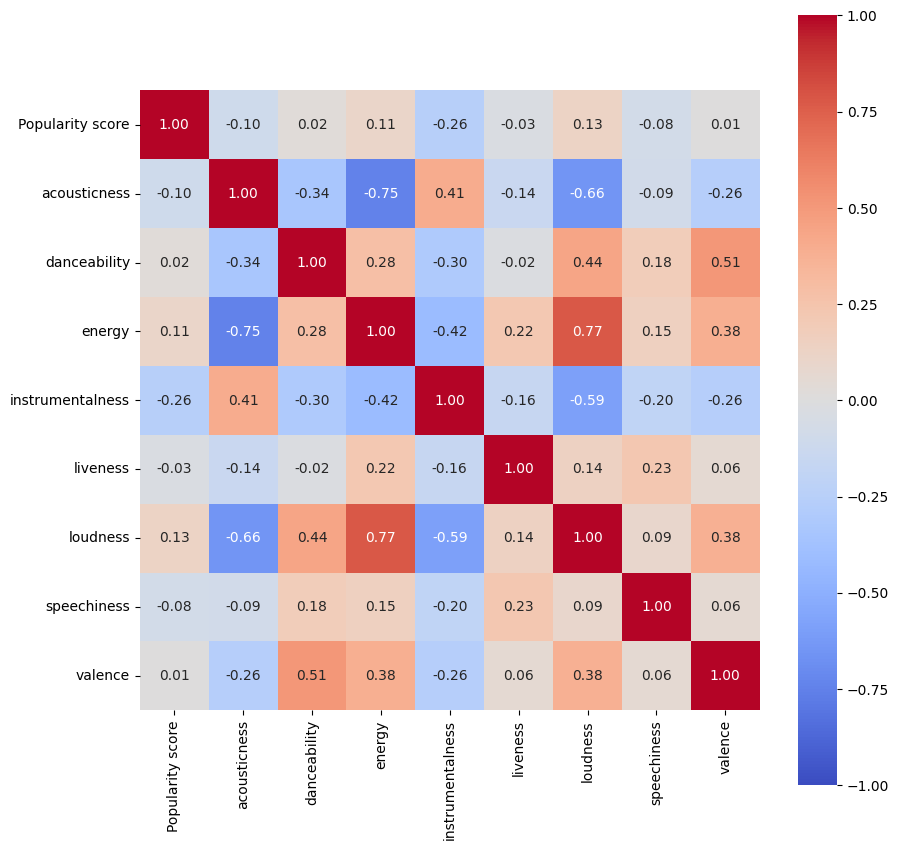

In [24]:
final = pd.read_csv("final.csv")

# features I am intrested in 
features = ['Popularity score', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

# correlation matrix
corr_matrix = final[features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, square=True)
plt.show()


This second heatmap visualizes the correlation between different audio features and the popularity score, helping to identify which features most strongly influence song popularity. This analysis is critical for feature selection in the recommendation model, ensuring that the most impactful features are prioritized.The heatmap shows that energy and loudness have a positive correlation with popularity, suggesting that more energetic and louder songs tend to be more popular. In contrast, instrumentalness and acousticness have a negative correlation, indicating that songs with fewer instrumental and acoustic elements are generally less popular.

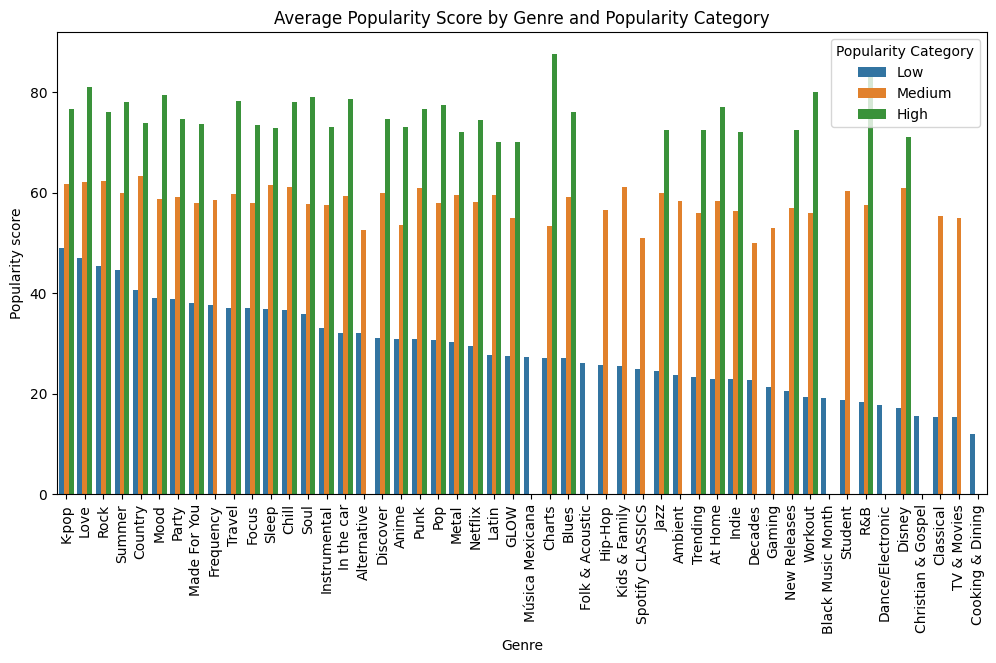

In [25]:
bins = [0, 49, 69, 100]  
labels = ['Low', 'Medium', 'High'] 

# add a popularity category 
final['Popularity Category'] = pd.cut(final['Popularity score'], bins=bins, labels=labels)

# Calculate the average popularity score for each genre and popularity category
genre_popularity = final.groupby(['Genre', 'Popularity Category'])['Popularity score'].mean().reset_index()

genre_popularity = genre_popularity.sort_values(['Popularity Category', 'Popularity score'], ascending=[True, False])

plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Popularity score', hue='Popularity Category', data=genre_popularity)
plt.xticks(rotation=90)
plt.title('Average Popularity Score by Genre and Popularity Category')
plt.show()


This bar plot visualizes the average popularity scores by genre and popularity category, providing a nuanced understanding of how different genres perform across varying levels of popularity. The plot shows that genres like Kpop, Love, and Rock consistently score high across all popularity categories, while genres like Cooking & Dining and Children's Music remain low. This suggests that the recommendation system should focus more on genres with consistently high popularity to enhance user satisfaction.

# Model Creation

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']])

## Song Recommendation Function
### Takes a song name input and return three similar songs based on their song features 

In [38]:
similarity_matrix = cosine_similarity(df_scaled)

def get_song_recommendations(song_name, top_n=3):
    
    # filter the dataframe 
    song_df = final[final['Track name'] == song_name]
    
  
    if song_df.empty:
        raise ValueError(f"Song '{song_name}' not found in the dataset.")
    
   
    song_index = song_df.index[0]
    
    # calculate cosine similarity
    similarity_scores = list(enumerate(similarity_matrix[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Exclude the input song itself
    song_indices = [i[0] for i in similarity_scores]
    
    return final.iloc[song_indices]

# Example attempt
try:
    recommendations = get_song_recommendations('Loveeeeeee Song')
    print(recommendations)
except ValueError as e:
    print(e)


                    Track ID                   Track name     Artist name  \
1114  6rdkCkjk6D12xRpdMXy0I2                    New Jeans        NewJeans   
1259  3CYKzBVzz7V5lj4gr4U2KY  Deep Sleep (Poppy Playtime)    Rockit Music   
1286  3IJYUaN3tx04S4TYyZHKoP                   Party Girl  StaySolidRocky   

      Popularity score  Release year  Genre  danceability  energy  key  \
1114                77          2023  K-pop         0.807   0.721    4   
1259                47          2024  Sleep         0.747   0.646    5   
1286                71          2020  Party         0.730   0.439    6   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
1114    -6.211     0       0.0508         0.510           0.00216    0.1150   
1259    -5.773     0       0.0424         0.297           0.00000    0.1090   
1286    -9.864     0       0.0609         0.747           0.00000    0.0988   

      valence    tempo  time_signature Popularity Category  
1114    0.532  1

## Mood Based Recommendation Function 
### Takes a mood input and returns three songs that match the users mood preference

In [43]:
#mood based recommendations 

mood_dict = {
    'happy': {'valence': (0.7, 1.0), 'danceability': (0.6, 1.0), 'energy': (0.6, 1.0)},
    'sad': {'valence': (0.0, 0.4), 'danceability': (0.0, 0.4), 'energy': (0.0, 0.4)},
    'relaxed': {'valence': (0.4, 0.7), 'danceability': (0.4, 0.7), 'energy': (0.4, 0.7)},
    'energetic': {'valence': (0.6, 1.0), 'danceability': (0.7, 1.0), 'energy': (0.7, 1.0)}
}

# adjust pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

def get_mood_recommendations(mood, top_n=3):
    if mood not in mood_dict:
        raise ValueError(f"Mood '{mood}' not found in mood_dict")
    
    mood_features = mood_dict[mood]
    
   
    filtered_songs = final
    for feature, (low, high) in mood_features.items():
        filtered_songs = filtered_songs[(final[feature] >= low) & (final[feature] <= high)]
    
   
    if len(filtered_songs) < top_n:
        top_songs = filtered_songs
    else:
        
        top_songs = filtered_songs.nlargest(top_n, 'Popularity score')
    
   
    top_songs = top_songs[['Track name', 'Artist name']]
    
    
    print(top_songs)

# Example: 
get_mood_recommendations('sad')


                                             Track name             Artist name
1460                               lovely (with Khalid)           Billie Eilish
1269  White Noise Sleeping Aid to Help My Baby Fall ...  White Noise Baby Sleep
746                                             Forever              Noah Kahan


C:\Users\harip\AppData\Local\Temp\ipykernel_6620\3845444361.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_songs = filtered_songs[(final[feature] >= low) & (final[feature] <= high)]
C:\Users\harip\AppData\Local\Temp\ipykernel_6620\3845444361.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_songs = filtered_songs[(final[feature] >= low) & (final[feature] <= high)]


In [45]:
get_mood_recommendations("relxed")

                     Track name    Artist name
852         MILLION DOLLAR BABY  Tommy Richman
860  BAND4BAND (feat. Lil Baby)    Central Cee
305                      greedy     Tate McRae


C:\Users\harip\AppData\Local\Temp\ipykernel_6620\3845444361.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_songs = filtered_songs[(final[feature] >= low) & (final[feature] <= high)]
C:\Users\harip\AppData\Local\Temp\ipykernel_6620\3845444361.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_songs = filtered_songs[(final[feature] >= low) & (final[feature] <= high)]
